## Imports + install 

In [ ]:
!pip install autogluon

In [1]:
import autogluon.core as ag
from autogluon.vision import ImagePredictor, ImageDataset
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import os
import cv2
import random

import torch

#### Cuda test

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')

Using device: cuda

Tesla K80
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


## Mount Drive

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Path on drive

In [5]:
path = '/content/drive/My Drive/DOG_VS_CAT'

#### List of images

In [ ]:
# On recupere la liste des images du dossier drive

image_list = [x for x in os.listdir(os.path.join(path, 'train')) if x.endswith('jpg')]

In [ ]:
# On melange les images si on ne veut prendre qu'un echantillon des donnees
random.shuffle(image_list)

In [ ]:
#image_list

In [ ]:
#os.path.basename(image_list[1]).split('.')[0]

In [ ]:
#Fonction pour labeliser les images entre chien et chat

def label_fn(x):
  if (os.path.basename(x).split('.')[0] == 'cat'):
    return 'cat'
  else :
    return 'dog'



In [ ]:
new_data = ImageDataset.from_name_func(image_list, label_fn, root=os.path.join(os.getcwd(), path, 'train'))
new_data

image  label
0      /content/drive/My Drive/DOG_VS_CAT/train/dog.6...      0
1      /content/drive/My Drive/DOG_VS_CAT/train/dog.7...      0
2      /content/drive/My Drive/DOG_VS_CAT/train/cat.1...      1
3      /content/drive/My Drive/DOG_VS_CAT/train/cat.5...      1
4      /content/drive/My Drive/DOG_VS_CAT/train/cat.9...      1
...                                                  ...    ...
24995  /content/drive/My Drive/DOG_VS_CAT/train/dog.6...      0
24996  /content/drive/My Drive/DOG_VS_CAT/train/dog.3...      0
24997  /content/drive/My Drive/DOG_VS_CAT/train/cat.2...      1
24998  /content/drive/My Drive/DOG_VS_CAT/train/cat.4...      1
24999  /content/drive/My Drive/DOG_VS_CAT/train/dog.1...      0

[25000 rows x 2 columns]

## Show random pictures

In [ ]:
new_data.show_images()

In [ ]:
# On ne prend qu'une petite partie des donnees pour nos tests et pour aller  plus vite

train_data = new_data[:1000]

In [ ]:
train_data.shape

(1000, 2)

In [ ]:
import PIL
print(PIL.PILLOW_VERSION)

## Save path

In [ ]:
save('/content/drive/My Drive/')

'' was not found in history, as a file, url, nor in the user namespace.


# Model

In [ ]:
#model = ag.Categorical('resnet18_v1b', 'mobilenetv3_small')

#model_list = ImagePredictor.list_models()

## Fit with autogluon

In [ ]:
predictor = ImagePredictor()

#The `fit` function splits the train data with a 90/10 ratio for validation
predictor.fit(train_data, hyperparameters={'epochs': 50})

In [ ]:
fit_result = predictor.fit_summary()

## Summary results

In [ ]:
fit_result

{'best_config': {'batch_size': 16,
  'dist_ip_addrs': None,
  'early_stop_baseline': -inf,
  'early_stop_max_value': inf,
  'early_stop_patience': 10,
  'epochs': 2,
  'final_fit': False,
  'gpus': [0],
  'log_dir': '/content/11f01126',
  'lr': 0.01,
  'model': 'resnet50',
  'ngpus_per_trial': 8,
  'nthreads_per_trial': 128,
  'num_trials': 1,
  'num_workers': 2,
  'problem_type': 'multiclass',
  'scheduler': 'local',
  'search_strategy': 'random',
  'searcher': 'random',
  'seed': 734,
  'time_limits': 7200,
  'wall_clock_tick': 1635706161.5956094},
 'fit_history': {'best_config': {'batch_size': 16,
   'dist_ip_addrs': None,
   'early_stop_baseline': -inf,
   'early_stop_max_value': inf,
   'early_stop_patience': 10,
   'epochs': 2,
   'final_fit': False,
   'gpus': [0],
   'log_dir': '/content/11f01126',
   'lr': 0.01,
   'model': 'resnet50',
   'ngpus_per_trial': 8,
   'nthreads_per_trial': 128,
   'num_trials': 1,
   'num_workers': 2,
   'problem_type': 'multiclass',
   'scheduler'

In [ ]:
print('Top-1 train acc: %.3f, val acc: %.3f' %(fit_result['train_acc'], fit_result['valid_acc']))

Top-1 train acc: 0.871, val acc: 0.950


## Get test pictures

In [ ]:
test_filenames = os.listdir('/content/drive/My Drive/DOG_VS_CAT/test')

In [ ]:
test_data=pd.DataFrame({
    'filename':test_filenames
})

## Short sample for test data

In [ ]:
short_test = test_data[:200]

In [ ]:
image_list_test = [x for x in os.listdir(os.path.join(path, 'test')) if x.endswith('jpg')]
test_data = ImageDataset(image_list_test, root=os.path.join(os.getcwd(), path, 'test'))

In [ ]:
test_data.columns = ['image']

In [ ]:
# NE RUN QUUNE SEULE FOIS

#for i in test_data:
#  test_data[i] =  '/content/drive/My Drive/DOG_VS_CAT/test/' + test_data[i]

In [ ]:
test_data

image
0       /content/drive/My Drive/DOG_VS_CAT/test/9816.jpg
1       /content/drive/My Drive/DOG_VS_CAT/test/9553.jpg
2       /content/drive/My Drive/DOG_VS_CAT/test/9286.jpg
3       /content/drive/My Drive/DOG_VS_CAT/test/9697.jpg
4       /content/drive/My Drive/DOG_VS_CAT/test/9688.jpg
...                                                  ...
12495  /content/drive/My Drive/DOG_VS_CAT/test/10474.jpg
12496  /content/drive/My Drive/DOG_VS_CAT/test/10509.jpg
12497  /content/drive/My Drive/DOG_VS_CAT/test/10415.jpg
12498  /content/drive/My Drive/DOG_VS_CAT/test/10452.jpg
12499  /content/drive/My Drive/DOG_VS_CAT/test/10544.jpg

[12500 rows x 1 columns]

In [ ]:
test_data['image'][0]

'/content/drive/My Drive/DOG_VS_CAT/test/9816.jpg'

In [ ]:
def predict_image(img):
  if (predictor.predict(img)[0] == 1):
    return 'CAT'
  else:
    return 'DOG'

## Prediction on test data (without label)

In [ ]:
predict_image(test_data['image'][5])

'DOG'

In [ ]:
# Probabilities
predictor.predict_proba(test_data['image'][5])

0         1
0  0.883314  0.116686

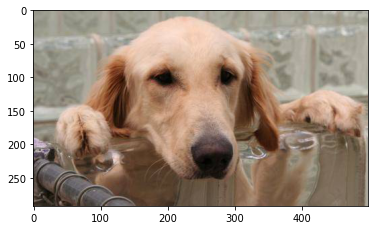

In [ ]:
# Read Images
img = mpimg.imread(test_data['image'][5])
  
# Output Images
plt.imshow(img)


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_reserved(0)/1024**3,1), 'GB')device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')fffff

In [ ]:
# On realise notre prediction sur 100 images du jeu de test

bulk_result = predictor.predict(test_data[:100])
print(bulk_result)

0     0
1     1
2     0
3     1
4     1
     ..
95    1
96    0
97    0
98    0
99    1
Name: label, Length: 100, dtype: int64


## Show bulk predictions

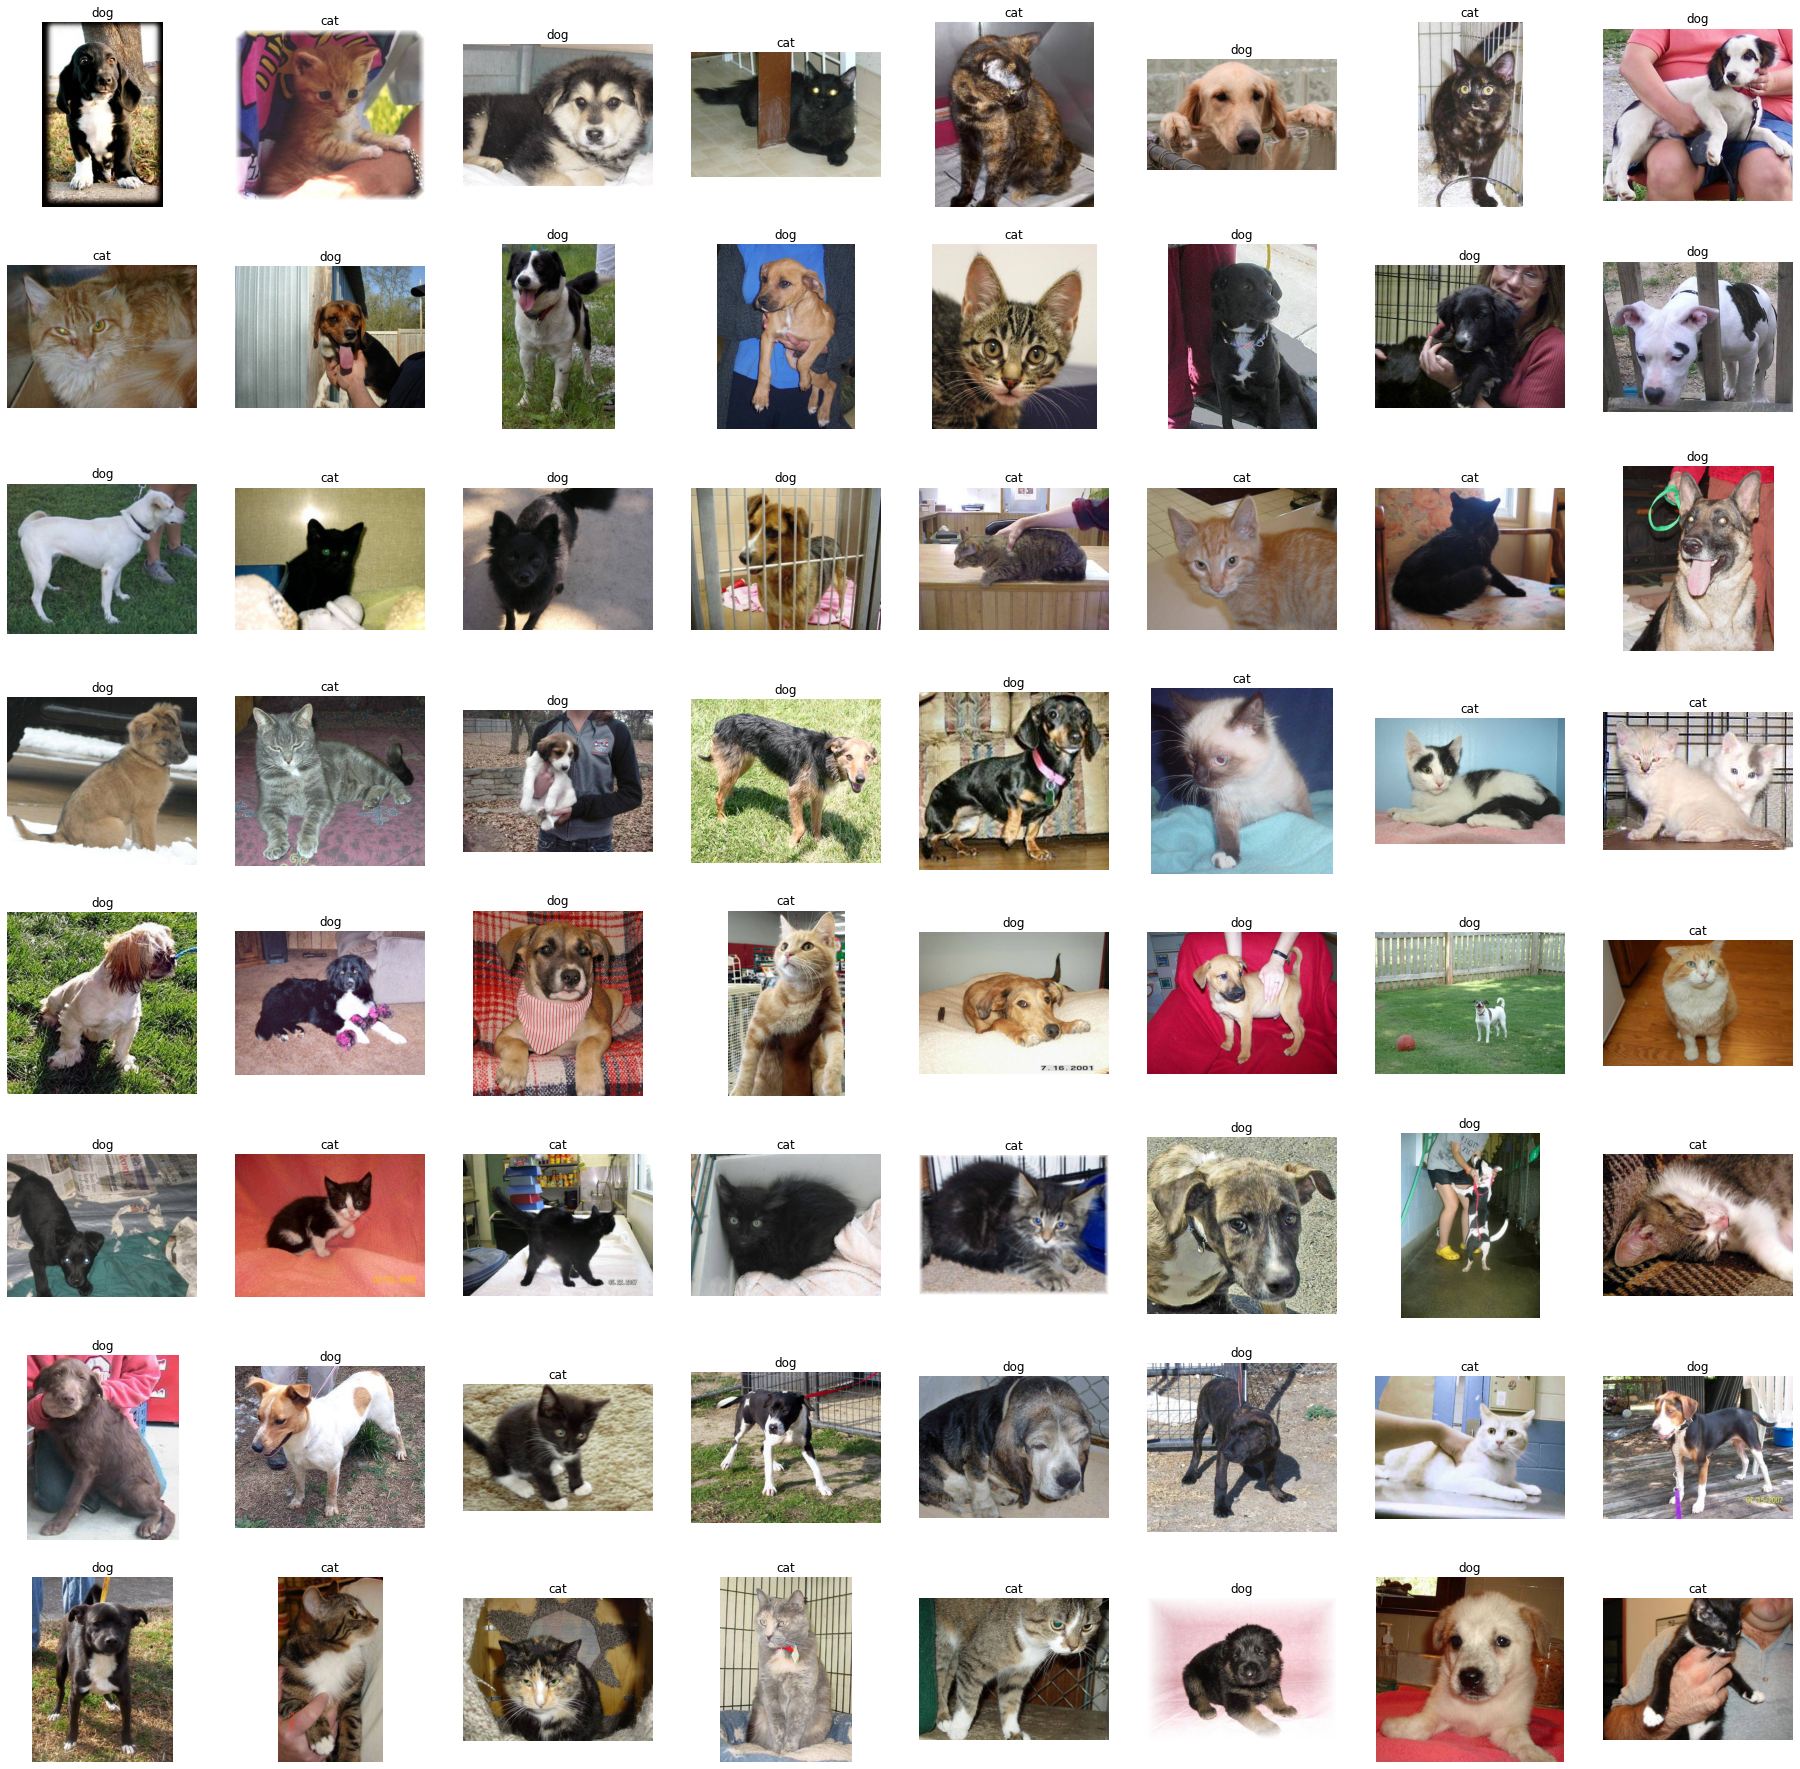

In [ ]:
plt.figure(figsize=(32,32))
for i in range (len(test_data['image'][:64])):
  plt.subplot(8,8,i+1)
  plt.imshow(mpimg.imread(test_data['image'][i]))
  plt.title('cat' if bulk_result[i] == 1 else 'dog')
  plt.axis('off')
plt.show()

## Save the model with pickle 

In [ ]:
import pickle

In [ ]:
pickle.dump( predictor, open('/content/drive/My Drive/model.pkl', "wb" ) )

## Test load model

In [ ]:
#model = pickle.load( open( "/content/drive/MyDrive/model IA Dog vs Cat/model.pkl", "rb" ))

In [ ]:
#model.predict(test_data['image'][0])